In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Annotations Dolly
annotations_dolly = pd.read_csv("../pipeline/argumentation-based/argumentation structure/dolly/train.csv", index_col='ID').reset_index()

# Annotations MARGOT
annotations_margot = pd.read_csv("../pipeline/argumentation-based/argumentation structure/margot/train.csv", index_col='ID').reset_index()

df_annotations = pd.merge(annotations_dolly, annotations_margot, how='inner', left_on='text', right_on='text', suffixes=('_dolly', '_margot')).set_index('ID_dolly')

In [3]:
df_annotations

,text,claim_dolly,evidence_dolly,structure_dolly,label_dolly,dataset_dolly,ID_margot,claim_margot,evidence_margot,structure_margot,label_margot,dataset_margot
ID_dolly,,,,,,,,,,,,
39998,peloton and leesa sleep have all given in to p...,"""The author claims that Sean Hannity has been ...","""the main evidence provided by the author in t...","claims:""The author claims that Sean Hannity ha...",FAKE,kaggle,39998,peloton has a link on amazon where users can r...,peloton and leesa sleep have all given in to p...,claims:peloton has a link on amazon where user...,FAKE,kaggle
22978,sally yates testimony before a congressional c...,"""The author argues that Sally Yates's testimon...","""The author of this article, Kyle Griffin, has...","claims:""The author argues that Sally Yates's t...",FAKE,kaggle,22978,<unk>,sally yates testimony before a congressional c...,claims:<unk>evidences:sally yates testimony be...,FAKE,kaggle
37963,corruption and socialism go hand in hand brazi...,"""the author argues that corruption and sociali...","""the author begins by explaining that brazil i...","claims:""the author argues that corruption and ...",FAKE,kaggle,37963,<unk>,it hasn t helped that the lower oil prices hav...,claims:<unk>evidences:it hasn t helped that th...,FAKE,kaggle
10828,right now the says up to 20 million people wil...,"""The author is correct to state that up to 20 ...","""The author states that up to 20 million peopl...","claims:""The author is correct to state that up...",FAKE,liar,10828,<unk>,right now the says up to 20 million people wil...,claims:<unk>evidences:right now the says up to...,FAKE,liar
10120,nearly 65 percent almost two thirds of all new...,"""The author is correct in stating that nearly ...","""The author states that nearly 65 percent almo...","claims:""The author is correct in stating that ...",REAL,liar,10120,<unk>,nearly 65 percent almost two thirds of all new...,claims:<unk>evidences:nearly 65 percent almost...,REAL,liar
...,...,...,...,...,...,...,...,...,...,...,...,...
37990,a short excerpt from cans upcoming documentary...,"""The author claims that in the upcoming docume...","""the author of this news article excerpt state...","claims:""The author claims that in the upcoming...",FAKE,kaggle,37990,<unk>,a short excerpt from cans upcoming documentary...,claims:<unk>evidences:a short excerpt from can...,FAKE,kaggle
1345,trumps supreme court list might reassure conse...,"""The author of the news article attempts to re...","""The article states that the move was seen as ...","claims:""The author of the news article attempt...",REAL,fake_real,1345,white house press secretary josh ernest said i...,trumps supreme court list might reassure conse...,claims:white house press secretary josh ernest...,REAL,fake_real
5843,faced with 1 dollars million in campaign debt ...,"""The author claims that Scott Walker is unload...","""The author argues that the governor is unload...","claims:""The author claims that Scott Walker is...",FAKE,liar,5843,<unk>,faced with 1 dollars million in campaign debt ...,claims:<unk>evidences:faced with 1 dollars mil...,FAKE,liar


In [4]:
# Only keep columns we need
df_annotations = df_annotations[['text', 'claim_margot', 'evidence_margot', 'claim_dolly', 'evidence_dolly', 'dataset_dolly', 'label_dolly']]
df_annotations.index.rename('ID', inplace=True)

# Remove options of <unk> (MARGOT)
df_annotations = df_annotations[df_annotations['claim_margot'] != '<unk>']
final_df_annotations = df_annotations[df_annotations['evidence_margot'] != '<unk>']

In [5]:
# Pick 5 random texts
sample = final_df_annotations.sample(10, random_state=42)

# Write out the preprocessed arugmentation-based for manual evaluation
sample.to_excel('manual.xlsx', index_label='ID')

In [6]:
temp = final_df_annotations[final_df_annotations['dataset_dolly'] == 'kaggle']
temp = temp[temp['text'].str.len() < 500]
print(temp.iloc[1]['evidence_dolly'])

display(final_df_annotations[final_df_annotations.index == temp.iloc[1].name])


"Hillary Clinton in a recent interview stated that she would continue the Obama administration's efforts to shut down the coal industry, stating that the coal industry was not "real" anymore and that the jobs that were dependent on it were not "real" jobs.  This is clearly a political attack, as she has long supported the coal industry and the associated jobs.  However, she is correct in that the coal industry is not what it once was, and her attempt to eliminate it entirely would result in more severe job losses in the region.  As of now, she is the Democratic candidate for president, and the republican candidate, Donald Trump, has expressed similar views on the coal industry, so it is likely that the coal industry will continue to decline under either candidate."


,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly,dataset_dolly,label_dolly
ID,,,,,,,
38045,west virginia has been devastated by a loss of...,if hillary clinton is elected we can see a con...,heres what she said a few weeks ago about the ...,"""Hillary Clinton said that she would continue ...","""Hillary Clinton in a recent interview stated ...",kaggle,FAKE


In [7]:
temp = final_df_annotations[final_df_annotations['dataset_dolly'] == 'liar']
print(temp.iloc[5]['evidence_dolly'])
# 
display(final_df_annotations[final_df_annotations.index == temp.iloc[1].name])


"The author presents evidence from the news article that whenever you buy an airline ticket the federal government runs a background check on you. The author claims this is evidence of the government's involvement in air travel."


,text,claim_margot,evidence_margot,claim_dolly,evidence_dolly,dataset_dolly,label_dolly
ID,,,,,,,
12658,even after obamacare is fully implemented ther...,the hardline has given democrats ammunition ag...,washington in an awkward meeting at the white ...,"""The main claim is based on the flawed premise...","""The author argues that the statistics provide...",liar,REAL


In [26]:
sample['word_count'] = sample['text'].str.split().apply(len)
sample.loc[sample['word_count'].idxmin()]

text               republican presidential candidate donald trump...
claim_margot       trump has come under new pressure to release f...
evidence_margot    republican presidential candidate donald trump...
claim_dolly        "The main claim made by the author in this new...
evidence_dolly     "The main evidence provided by the author in t...
dataset_dolly                                                 kaggle
label_dolly                                                     REAL
word_count                                                       260
Name: 8615, dtype: object

In [27]:
manual_anotations = pd.read_excel("manual_eval.xlsx", index_col='ID')
manual_anotations

,claim_manual,evidence_manual
ID,,
3425,[President Donald Trump is still searching for...,"[The recruitment process has been chaotic.],[T..."
8615,[Donald Trump has refused to release his tax r...,"[Paul Manafort, stated that Trump's tax return..."
43196,[There is hypocrisy in the way the world respo...,[There was absence of a strong response from t...
8708,[Merrick Garland's nomination to the United St...,[Garland's nomination matches the previous rec...
406,[Trump declared himself the presumptive nomine...,[Donald Trump won all five Republican presiden...
15482,[Indonesia's Constitutional Court affirmed the...,[The court ruling followed a legal challenge b...
8541,[Donald Trump's White House campaign was in tu...,[Trump denied support to both Ryan and Senator...
1294,[Millennials are more liberal than their paren...,[The Republican National Committee and individ...
5865,[The new immigration curbs in the United State...,[President Donald Trump's executive order bans...


In [35]:
matrix_margot = np.array([
    [8, 1],
    [2, 9]
])

# Results Dolly
matrix_dolly = np.array([
    [8, 2],
    [1, 8]
])

matrix_dolly = matrix_dolly / 10 * 100
matrix_margot = matrix_margot / 10 * 100

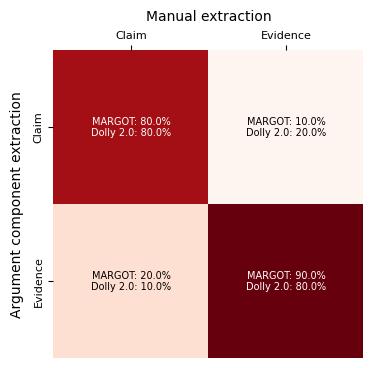

In [80]:
labels = ['Claim', 'Evidence']

fig = plt.figure(figsize=(4, 4))

ax = sns.heatmap(matrix_margot, 
            annot=False,
            cmap="Reds",
            cbar=False)

ax.set_xticklabels(labels, fontsize=8)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.set_yticklabels(labels, fontsize=8)


text_colors = [['white' if (i == 0 and j == 0) or (i == len(labels) - 1 and j == len(labels) - 1) else 'black'
                for j in range(len(labels))] for i in range(len(labels))]

for i in range(len(labels)):
    for j in range(len(labels)):
        lab = f'MARGOT: {matrix_margot[i, j]}%\nDolly 2.0: {matrix_dolly[i, j]}%'
        ax.text(j + 0.5, i + 0.5, lab,ha='center', va='center', color=text_colors[i][j], fontsize=7)

ax.set_xlabel("Manual extraction", fontsize=10)
ax.set_ylabel("Argument component extraction", fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.labelpad = 7
ax.yaxis.labelpad = 7

fig.add_axes(ax)

fig.savefig('confusion.png')

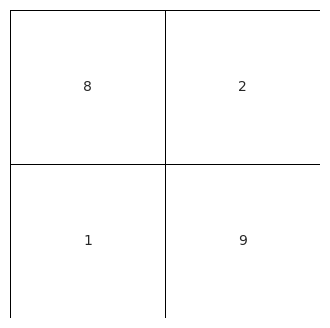

In [32]:
import matplotlib.cm as cm

sns.set_style("whitegrid", {'axes.grid' : True})


labels = ['Claim', 'Evidence']

# Create a figure with two subplots
# fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig = plt.figure(figsize=(4, 4))

# Plot the first confusion matrix
conf_matrix = sns.heatmap(matrix_margot, 
            annot=True, 
            linewidth=.7, 
            linecolor='black',
            cmap=ListedColormap(['white']), 
            yticklabels=False,
            xticklabels=False,
            # grid=False,
            # fmt=".1%", 
            cbar=False)
# Turns off grid on the left Axis.
# conf_matrix.hlines([0, 2], *conf_matrix.get_xlim(), colors='black', linewidths=0.5)
# conf_matrix.vlines([0, 2], *conf_matrix.get_ylim(), colors='black', linewidths=0.5)

# # Add gridlines for the fields in the middle of the heatmap
# conf_matrix.hlines([1], *conf_matrix.get_xlim(), colors='black', linewidths=1)
# conf_matrix.vlines([1], *conf_matrix.get_ylim(), colors='black', linewidths=1)


fig.add_axes(conf_matrix)


plt.show()
# fig.set_xticklabels(labels)
# axes.set_yticklabels(labels)
# axes.set_xticks(np.arange(len(labels)) + 0.5)
# axes.set_yticks(np.arange(len(labels)) + 0.5)
# for i in range(len(labels)):
#     for j in range(len(labels)):
#         lab = f'Dolly 2.0: {matrix_dolly[i, j]}%\nMARGOT: {matrix_margot[i, j]}%'
#         print(matrix_dolly[i, j])
#         conf_matrix.text(j + 0.5, i + 0.5, lab,
#                      ha='center', va='center', color='black')


